# Predicting winning teams of League of Legends Games

# 1. Introduction

The objective of this League of Legends (LoL) project is to predict the aspects of game plays that influence the winning teams (red or blue) in the game. League of Legends is the most competitive and dominant Multiplayer online battle arena (MOBA) game in the world and as the level of pro players are increased and set to high-quality equalized, importance of data analytics had risen in pro-level tournaments from recent few years.<br><br>
The dataset wasa sourced from the Kaggle at https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min (michel's fanboi, 2020) <br>
The report is organized as follows: <br>
* Section 2 (Overview) outlines the methodoloy
* Section 3 (Data Preparation) summarize the data prepareation process and our model evaluation strategy.
* Section 4 (Data Exploration & Visualisation)
* Section 5 (Predictive Modelling)
* Section 6 (Summary & Conclusion)

# 2. Overview

## 2.1 Methodology

We will be using 3 algorithms to predict the target feature.
* K-Nearest Neighbourhood (KNN)
* Naive Bayes (NB)
* Decision Tree (DT)

During our preprocessing, we will focus on dataset for ready to process. We will split dataset into training and test dataset at ratio of 70:30, which will result in approximately 6915 and 2964 observations each. Training dataset will be used for hyperparametric tuning phase, and test dataset will be used for performance comparision phase, where we compare the fitting of the models

Before practicing the dataset, we will be comparing variouos feature selection method. Such as F-score, mutual information method and Random Forest Importance. We will also consider the number of features that are going to be use d either 10 or 12 (full features). Feature Selection method will be chosen 5-fold stratified cross-validation. Fine-Tune Hyperparameters will be determined using AUC score(Area under Curve) as indicator of the performance measure.

After tuning hyperparameters, we compare the performance of each algorithms by t-test with tuned classifiers. We will also compare recall scores and confusion matrices on the test data to test fittings of each clssifiers.

## 2.2 Data Source

The dataset is collected from high-elo solo qued ranked games for first 10 minutes statistics for each team by Michel's fanboi (April, 2020). The dataset consists of 1 csv file, 19 attributes for each teams and 9,879 observations recorded. <br><br>
Baed on our understanding of the game, League of Legends is Player vs Player game, we came up to the point that every variables should be considered relatively. We have considered that how much you play better compare to opponent team is more important rather than objective numbers of how much the certain team does in each game. So we will combine blue and red descriptive features by calculate the differences. 



## 2.3 Project Objective

Our ultimate goal is predicting winning team based on the information given in first 10 minutes of game plays and identify the most relevant aspects of the game that lead to win games. 

## 2.4 Target Feature

Our target feature is 'Wins', which 1 if the blue team has won, 0 otherwise.

## 2.5 Descriptive Features

Each features are relatively based on blue side, differences of blue compare to red.

* WardsPlaced: Number of more warding totems placed by the blue team on the map
* WardsDestroyed: Number of more enemy warding totems the blue team has destroyed
* FirstBlood: First kill of the game. 1 if the blue team did the first kill, 0 otherwise
* Kills: Number of more enemies killed by the team
* Assists: Number of more kill assists
* Dragons: Number of moredragons killed by the blue team
* Heralds: Number of more heralds killed by the blue team
* TowersDestoryed: Number of more structures destroyed by the blue team
* Gold: Differences of the Team total gold
* Experience: Differences of the Team total experience
* MinionsKilled: Differences of the Team total minions killed (CS)
* JungleMinionsKilled: Differences of the Team total jungle monsters killed

Most of the descriptive features are self-explanatory.

# 3. Data Preparation

## 3.1 Loading Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import io
import requests

dataset = pd.read_csv("high_diamond_ranked_10min.csv")
dataset_col = dataset.columns.values

print(dataset.shape)
print(dataset.dtypes)

(9879, 40)
gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                     

* There are 9879 observations and 1 Target Feature, 38 Descriptive Features and 1 ID column.
* There are no categorical values which needs to be converted to numeric in data preparation. Every rows contain numeric values only.

## 3.2 Checking for missing values

In [2]:
dataset.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

There are no missing values to process any data preparations.

## 3.3 Data Cleaning and Transformation

We delete ID column. ID variable is not relevant for providing useful information to analyze which of the team wins the game in our report. <br>

In [3]:
data = dataset.copy()
data = data.drop(columns=['gameId'])

We combine blue and red features into one by calculating the differences of each descriptive features. 

In [4]:
data['Wins'] = data['blueWins']
data['FirstBlood'] = data['blueFirstBlood']
data['WardsPlaced'] = data['blueWardsPlaced'] - data['redWardsPlaced']
data['WardsDestroyed'] = data['blueWardsDestroyed'] - data['redWardsDestroyed']
data['Dragons'] = data['blueDragons'] - data['redDragons']
data['Heralds'] = data['blueHeralds'] - data['redHeralds']
data['Kills'] = data['blueKills'] - data['blueDeaths']
data['Assists'] = data['blueAssists'] - data['redAssists']
data['TowersDestroyed'] = data['blueTowersDestroyed'] - data['redTowersDestroyed']
data['Gold'] = data['blueGoldDiff']
data['Experience'] = data['blueExperienceDiff']
data['MinionsKilled'] = data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled']
data['JungleMinionsKilled'] = data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled']

In [5]:
data = data.drop(columns=['blueWins', 'blueFirstBlood', 'blueWardsPlaced', 'redWardsPlaced', 'blueDragons', 'redDragons', 'blueHeralds', 'redHeralds', 'blueKills', 'redKills', 'blueAssists', 'redAssists', 'blueTowersDestroyed', 'redTowersDestroyed',
                         'blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled', 'blueWardsDestroyed', 'redWardsDestroyed', 'blueGoldDiff', 'blueExperienceDiff'])

We drop descriptive features that duplicate the existing features which contain similar or duplicated information.
* Deaths: Relevant deaths can be found from each team's kills.
* redFirstblood: Firstblood is either blue or red. We use blueFirstblood.
* EliteMonsters: Sum of dragons and heralds.
* AvgLevel: Duplicate of TotalExperience
* CSPerMin: Duplicate of TotalMinionsKilled
* GoldPerMin: Duplicate of TotalGold
* TotalExperience: We use ExperienceDiff.
* TotalGold: We use GoldDiff

 

In [6]:
data = data.drop(columns=['redDeaths', 'redFirstBlood', 'blueEliteMonsters', 'redEliteMonsters', 'blueDeaths', 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin', 'redGoldPerMin', 'redGoldDiff', 'redExperienceDiff',
                          'blueTotalExperience', 'redTotalExperience', 'blueTotalGold', 'redTotalGold', 'blueAvgLevel', 'redAvgLevel'])

In [7]:
data.head()

Wins  FirstBlood  WardsPlaced  WardsDestroyed  Dragons  Heralds  Kills  \
0     0           1           13              -4        0        0      3   
1     0           0            0               0       -1       -1      0   
2     0           0            0              -3        1        0     -4   
3     0           0           28              -1        0        1     -1   
4     0           0           58               2       -1        0      0   

   Assists  TowersDestroyed  Gold  Experience  MinionsKilled  \
0        3                0   643          -8             -2   
1        3               -1 -2908       -1173            -66   
2      -10                0 -1172       -1033            -17   
3       -5                0 -1321          -7            -34   
4       -1                0 -1004         230            -15   

   JungleMinionsKilled  
0                  -19  
1                   -9  
2                   18  
3                    8  
4                  -10

## 3.4 Summary statistics

Since every descriptive features are numeric, we display summary statistics to ensure that taking difference of the features are applied correctly. We expect mean of Wins/FirstBlood to be close to 0.5 (either blue or red), otherwise 0.

In [8]:
data.describe(include='all')

Wins   FirstBlood  WardsPlaced  WardsDestroyed      Dragons  \
count  9879.000000  9879.000000  9879.000000     9879.000000  9879.000000   
mean      0.499038     0.504808    -0.079664        0.101731    -0.051119   
std       0.500024     0.500002    25.960582        2.854910     0.878945   
min       0.000000     0.000000  -260.000000      -23.000000    -1.000000   
25%       0.000000     0.000000    -4.000000       -1.000000    -1.000000   
50%       0.000000     1.000000     0.000000        0.000000     0.000000   
75%       1.000000     1.000000     4.000000        1.000000     1.000000   
max       1.000000     1.000000   234.000000       23.000000     1.000000   

           Heralds        Kills      Assists  TowersDestroyed          Gold  \
count  9879.000000  9879.000000  9879.000000      9879.000000   9879.000000   
mean      0.027938     0.046260    -0.017006         0.008402     14.414111   
std       0.589292     4.195489     5.766787         0.324835   2453.349179   
min      -1.000000   -17.000000   -25.000000        -2.000000 -10830.000000   
25%       0.000000    -3.000000    -4.000000         0.000000  -1585.500000   
50%       0.000000     0.000000     0.000000         0.000000     14.000000   
75%       0.000000     3.000000     4.000000         0.000000   1596.000000   
max       1.000000    16.000000    23.000000         4.000000  11467.000000   

        Experience  MinionsKilled  JungleMinionsKilled  
count  9879.000000    9879.000000          9879.000000  
mean    -33.620306      -0.649661            -0.803421  
std    1920.370438      30.942675            14.274733  
min   -9333.000000    -120.000000           -72.000000  
25%   -1290.500000     -21.000000           -10.000000  
50%     -28.000000      -1.000000             0.000000  
75%    1212.000000      20.000000             8.000000  
max    8348.000000     127.000000            64.000000

## 3.5 Scailing Features

We performed min-max scale to descriptive features to ready to fit predictive models.

In [9]:
data1 = data.copy()
data1 = data.drop(columns='Wins')
target = data['Wins']

from sklearn import preprocessing

data1_df = data1.copy()
data_scaler = preprocessing.MinMaxScaler()
data_scaler.fit(data1)
data1 = data_scaler.fit_transform(data1)

pd.DataFrame(data1, columns=data1_df.columns).sample(5, random_state=999)

FirstBlood  WardsPlaced  WardsDestroyed  Dragons  Heralds     Kills  \
4387         1.0     0.528340        0.521739      0.5      0.5  0.484848   
3500         0.0     0.471660        0.934783      0.0      0.0  0.454545   
790          0.0     0.534413        0.478261      1.0      0.0  0.727273   
7993         0.0     0.528340        0.478261      1.0      1.0  0.606061   
4910         1.0     0.528340        0.413043      0.5      1.0  0.545455   

       Assists  TowersDestroyed      Gold  Experience  MinionsKilled  \
4387  0.458333         0.333333  0.412118    0.436797       0.153846   
3500  0.500000         0.333333  0.453021    0.492789       0.530364   
790   0.812500         0.333333  0.662242    0.647248       0.700405   
7993  0.520833         0.333333  0.562677    0.631752       0.429150   
4910  0.458333         0.333333  0.486164    0.540467       0.348178   

      JungleMinionsKilled  
4387             0.558824  
3500             0.433824  
790              0.382353  
7993             0.705882  
4910             0.477941

We performed min-max scale to descriptive features to ready to fit predictive models.

## 3.6 Train-Test Splitting

We are going to use the full dataset without sampling. However we will split the full dataset into train and test dataset at ratio of 70:30. Number of observation is not exactly 10K, but it will roughly round up to 7K of training dataset and 3K of Testing dataset.

In [10]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test \
= train_test_split(data1, target, test_size = 0.3, random_state=999, stratify = target)

print(data_train.shape)
print(data_test.shape)

(6915, 12)
(2964, 12)


# 4. Data Exploration & Visualisation

## 4.1 Univariate Visualisation

When we identify which team is ahead, we first compare gold then experience. Two aspects are very simple and powerful indicator that shows the team is ahead or behind to opponent team. We informed that Gold Difference at first 10 minutes is one of the most important feature that may determines the win/loss of the game. We will display the boxplot and histogram of Gold Difference. 

There are few reasons we decided not to sample from the full dataset.
* 9879 observation is over the recommended number of observations. We decided we can handle it and proceed without sampling.

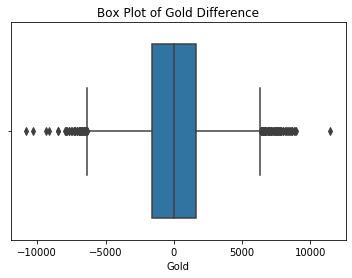

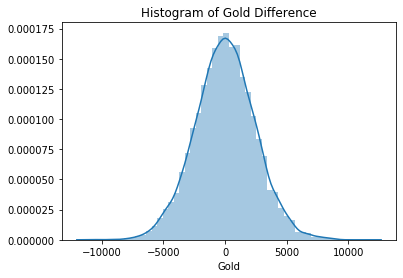

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['Gold']).set_title('Box Plot of Gold Difference')
plt.show();
sns.distplot(data['Gold'], kde = True).set_title('Histogram of Gold Difference')
plt.show();

Referring to the graphs, Gold Difference is distributed as what we have expected to be. Mean is set to as close to 0 with no right/left skewness. Gold Difference is well distributed around the center.

## 4.2 Multivariate Visualisation

In League of Legends, easist way to get ahead of opponent team is making enemy kills. You also gain gold from every enemy kills and minion kills. Gold difference is usually caused by the enemy kills at high-elo, and moreover making kills will lead opponent to have less time for farming minions. We will explore relationships between golds against enemy kills and enemy kills against minion kills by plotting graphs.

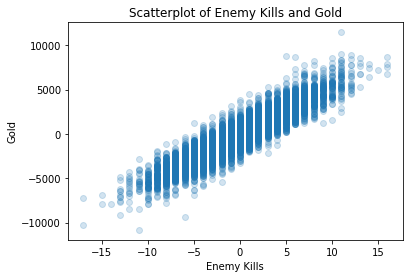

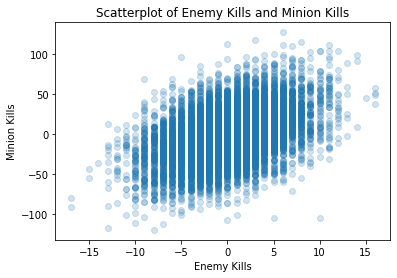

In [12]:
plt.scatter(data['Kills'], data['Gold'], alpha = 0.2)
plt.title('Scatterplot of Enemy Kills and Gold')
plt.xlabel('Enemy Kills')
plt.ylabel('Gold')
plt.show();

plt.scatter(data['Kills'], data['MinionsKilled'], alpha = 0.2)
plt.title('Scatterplot of Enemy Kills and Minion Kills')
plt.xlabel('Enemy Kills')
plt.ylabel('Minion Kills')
plt.show();

It is clear that Gold Difference and Enemy Kills are very closly related that the data is distributed around the positive linear line. But we have to be careful about the fact that each kills produce approximately 300 golds on average. Gradient of the Gold versus Enemy Kills is expected to be above 300, as the player who get killed by the enemy will have less time to farm golds. 

We have further plotted the graph of Minion Kills against Enemy Kills to point out the relationships that kills are at least more than the 300 gold itself. In this plot, the positive relationship is not as clear as gold. But data is more likely to be distributed with positive relationships with eliptic shape. We can assume that if you take down enemy, enemy is less more likely to have less minions that lead to produce more golds.

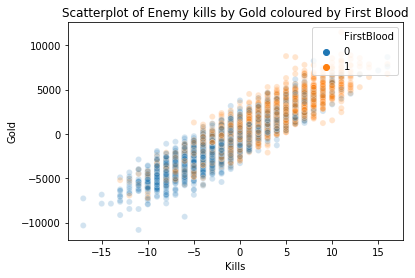

In [13]:
sns.scatterplot(data['Kills'], data['Gold'], hue = data['FirstBlood'], alpha=0.2)
plt.title('Scatterplot of Enemy kills by Gold coloured by First Blood');
plt.legend(loc = 'upper right')
plt.show(); 

Blue dot is when red team got the first blood and yellow dot is when blue team got first blood. First Blood gives 100 golds extra on top of the 300 golds. In terms of the gold-wise, first blood is crucial in first 10 minutes. The team which had first blood will highly likely to have gold advantage in first 10 minutes. Regarding the translation of 400 gold/1 kill in positive direction of the graph, yellow dot is mainly spreaded over the positive kills-positive gold.

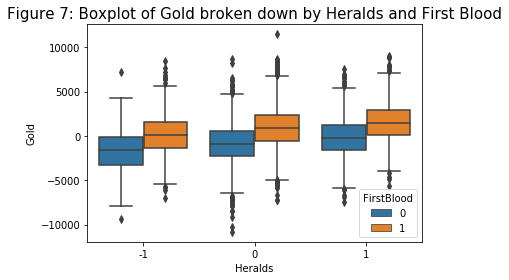

In [14]:
sns.boxplot(data['Heralds'], data['Gold'], hue = data['FirstBlood'])
plt.title('Figure 7: Boxplot of Gold broken down by Heralds and First Blood', fontsize = 15)
plt.show();

Herald is one important aspect which can lead the team to have great gold advantage at early game and often compared the value with Dragons. From the above boxplot, first blood and heralds will lead the team to have more gold at 10 minutes on average.

# 5. Predictive Modelling

## 5.1 Feature Selection and Ranking

In this section, we want to achieve insight ranking of impportance of the descriptive features. We will be working with the preprocessed dataset, first evaluate the top 10 features via the various method using train dataset and cross-validated performance with test dataset. And at the end of the section, we will compare performance of the feature selection method and highlight the best method. We will use stratified 5-fold cross-validation with no repetitions during training. For testing, we will use the fine-tuned model for prediction without any cross-validation.

### Cross-Validated performance of DT Classifier using Test Dataset with all the features.

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
cv_method = StratifiedKFold(n_splits=5, random_state=999)
num_features = 10
scoring_metric = 'roc_auc'
clf = DecisionTreeClassifier(max_depth=5, random_state=999)

In [16]:
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
cv_results_full = cross_val_score(estimator=clf,
                             X=data_test,
                             y=target_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_full = cv_results_full.mean().round(5)
print(cv_perf_full)

0.77802


### Select the top 10 features via the F-Score method using the train data.

In [17]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(data_train, target_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
# Let's see what these top features are
best_features_fscore = data1_df.columns[fs_indices_fscore].values
best_features_fscore


cv_results_fscore = cross_val_score(estimator=clf,
                             X=data_test[:, fs_indices_fscore],
                             y=target_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_fscore = cv_results_fscore.mean().round(5)

print(best_features_fscore)
print(cv_perf_fscore)

['Gold' 'Experience' 'Kills' 'Assists' 'MinionsKilled' 'Dragons'
 'FirstBlood' 'JungleMinionsKilled' 'TowersDestroyed' 'Heralds']
0.778


### Select the top 10 features via the mutual information method using the train data.

In [18]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(data_train, target_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
# Let's see what these top features are
best_features_mutual_info = data1_df.columns[fs_indices_mutual_info].values
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=data_test[:, fs_indices_mutual_info],
                             y=target_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_mutual_info = cv_results_mutual_info.mean().round(5)

print(best_features_mutual_info)
print(cv_perf_mutual_info)

['Gold' 'Experience' 'Kills' 'Assists' 'MinionsKilled' 'FirstBlood'
 'Dragons' 'TowersDestroyed' 'JungleMinionsKilled' 'WardsPlaced']
0.78008


### Select the top 10 features via the Random Forest Importance method using the train data.

In [19]:
from sklearn.ensemble import RandomForestClassifier
model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
model_rfi.fit(data_train, target_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
# Let's see what these top features are
best_features_rfi = data1_df.columns[fs_indices_rfi].values
cv_results_rfi = cross_val_score(estimator=clf,
                             X=data_test[:, fs_indices_rfi],
                             y=target_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_rfi = cv_results_rfi.mean().round(5)

print(best_features_rfi)
print(cv_perf_rfi)

['Gold' 'Experience' 'MinionsKilled' 'JungleMinionsKilled' 'Assists'
 'WardsPlaced' 'Kills' 'WardsDestroyed' 'Dragons' 'Heralds']
0.77801


### Summary

In [20]:
print(f'Full Set of Features (with {data_train.shape[1]} Features):', cv_perf_full)
print(f'Feature Selection with {num_features} Features:')
print('F-Score:', cv_perf_fscore)
print('Mutual Information:', cv_perf_mutual_info)
print('RFI:', cv_perf_rfi)
from scipy import stats
print('P-Value for Full vs F-Score:', stats.ttest_rel(cv_results_full, cv_results_fscore).pvalue.round(3))
print('P-Value for Full vs Mutual Information:', stats.ttest_rel(cv_results_full, cv_results_mutual_info).pvalue.round(3))
print('P-Value for Full vs RFI:', stats.ttest_rel(cv_results_full, cv_results_rfi).pvalue.round(3))

Full Set of Features (with 12 Features): 0.77802
Feature Selection with 10 Features:
F-Score: 0.778
Mutual Information: 0.78008
RFI: 0.77801
P-Value for Full vs F-Score: 0.998
P-Value for Full vs Mutual Information: 0.24
P-Value for Full vs RFI: 0.998


Random Forest Importance Method have shown the best performance for feature selection method, followed by Mutual Inofrmation and F-score. All three feature selection methods have shown well performance as there are no p-value less than 0.05 to be rejected as statistically different result. RFI have shown the closest cross-validated performance and highest p-value. 

In [21]:
from sklearn.ensemble import RandomForestClassifier

%config InlineBackend.figure_format = 'retina'

import altair as alt
alt.renderers.enable('html')

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [22]:
from sklearn.ensemble import RandomForestClassifier

num_features = 12

%config InlineBackend.figure_format = 'retina'

import altair as alt
alt.renderers.enable('html')

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [23]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

alt.Chart(...)

We observed that Gold and Experience differences are about equally the most important feature that determine win or lose of the game. In order to verify the performance of feature selection and rankings, we evaluate cross-validated performance of DT classifiers uisng the test data with all 12 features.

## 5.2 Hyperparameter Tune-Fining

### 5.2.1 K-Nearest Neighbors

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

And we load the customized pre-defined RFI Feature Selector Function nad get search result function which will output as pandas dataframe format for convenience. (SKL Prac5)

In [25]:
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [8, 10, data1_df.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [27]:
gs_pipe_KNN.fit(data_train, target_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:   12.8s finished


In [28]:
print(gs_pipe_KNN.best_params_)
print(gs_pipe_KNN.best_score_)

{'knn__n_neighbors': 20, 'knn__p': 1, 'rfi_fs__n_features_': 10}
0.7900909449721665


We observe that the optimal KNN model has a mean AUC score of 0.790. The best performing KNN selected 10 features with 20 nearest neighbors and p=1, which is the Manhattan distance. we will use grind search results to see if different combinations are significant or not.

In [29]:
def get_search_results(gs):
    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})
    models = []
    scores = []
    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))
    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))
    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)
    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]
    return pipe_results[columns]

In [30]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

mean_score  std_score  max_score  min_score  knn__n_neighbors  knn__p  \
25    0.790091   0.010783   0.808664   0.778011              20.0     1.0   
28    0.785447   0.009770   0.802058   0.772672              20.0     2.0   
26    0.784840   0.015363   0.811387   0.767004              20.0     1.0   
27    0.782686   0.010548   0.796524   0.771507              20.0     2.0   
19    0.782289   0.008533   0.795411   0.768696              15.0     1.0   

    rfi_fs__n_features_  
25                 10.0  
28                 10.0  
26                 12.0  
27                  8.0  
19                 10.0

Regarding the result, there is no significant differences for different combinations of p and number of features. We plot the above results to make it easier to see the changes.

In [31]:
import altair as alt

results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

alt.Chart(...)

### 5.2.2 Naive Bayes

In this process, we optimize var_smoothing, set to $10^{-9}$ by default. We grid search from 10 to $10^{-3}$ with 200 steps.

In [32]:
from sklearn.preprocessing import PowerTransformer
data_train_transformed = PowerTransformer().fit_transform(data_train)

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [8, 10, data1_df.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(data_train_transformed, target_train);



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    6.8s finished


In [33]:
print(gs_pipe_NB.best_params_)
print(gs_pipe_NB.best_score_)

{'rfi_fs__n_features_': 12, 'nb__var_smoothing': 1.431458937523479}
0.8068721973850128


The optimal NB AUC score is produced 0.806 with 10 features. This is little higher score than KNN method. We will compare the performance of each methodology later. We plot results and visualize change of NB performance comparisons.

In [34]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

mean_score  std_score  max_score  min_score  rfi_fs__n_features_  \
3     0.806872   0.012945   0.824667   0.791944                 12.0   
5     0.806855   0.012431   0.825685   0.792814                 10.0   
18    0.806809   0.013072   0.824849   0.791656                 12.0   
9     0.806690   0.013479   0.825309   0.790867                 12.0   
8     0.806688   0.013500   0.825326   0.790840                 12.0   

    nb__var_smoothing  
3            1.431459  
5            4.347013  
18           0.714943  
9            0.021215  
8            0.002768

In [35]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

alt.Chart(...)

### 5.2.3 Decision Tree

Next, we use Decision Tree with Gini Index. We will focus on searching optimal maximum depth and minimum sample split. 

In [36]:
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [8, 10, data1.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(data_train, target_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:    6.0s finished


In [37]:
print(gs_pipe_DT.best_params_)
print(gs_pipe_DT.best_score_)

{'dt__max_depth': 4, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}
0.7984871187514734


From the above result, maximum depth is 4 and minimum sample split suppose to be 2. And we obtained AUC score of 0.798.

In [38]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

We have figured out the optimal maximum depth and minimum sample splits. We will try more to find the combinations that produce better result. 

In [39]:
params_pipe_DT2 = {'rfi_fs__n_features_': [8, 10, 12],
                  'dt__max_depth': [4, 8, 12],
                  'dt__min_samples_split': [1, 2, 10, 50, 100]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(data_train, target_train);

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-2)]: Done 225 out of 225 | elapsed:   15.0s finished


In [40]:
print(gs_pipe_DT2.best_params_)
print(gs_pipe_DT2.best_score_)

{'dt__max_depth': 4, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}
0.7984871187514734


Expanding the combinations did not improve the performance of AUC score and the above result was already optimized.

In [41]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

mean_score  std_score  max_score  min_score  dt__max_depth  \
4     0.798487   0.016654   0.821012   0.782896            4.0   
5     0.798487   0.016654   0.821012   0.782896            4.0   
7     0.798487   0.016654   0.821012   0.782896            4.0   
8     0.798487   0.016654   0.821012   0.782896            4.0   
10    0.798487   0.016654   0.821012   0.782896            4.0   

    dt__min_samples_split  rfi_fs__n_features_  
4                     2.0                 10.0  
5                     2.0                 12.0  
7                    10.0                 10.0  
8                    10.0                 12.0  
10                   50.0                 10.0

We will visualize the above results.

In [42]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

alt.Chart(...)

## 5.3 Performance Comparison

From the above hyperparameter tuning phase, we used 9879 observations splitted into 7:3 as training and test dataset, 6915 trainning and 2964 test observations each. From the first cross-validation method, we have noticed that Random Forest Importance method have shown to be the best feature selection method in 10 feature selections. Then we used KNN and output that best set of hyperparameter values were k=100, p=1, n=10. We have produced highest AUC score by using Naive Bayes, obtained the optimal smoothing variable at n=12. Lastly in decision tree, we again have found that using 10 features have shown better performance.

We will compare the performance of each algorithmns by fitting each tuned hyperparameters into the test dataset to see which the mehtod perform the best. We will conduct paired t-test for AUC Score and cross-validation method, stratified 5 fold cross validation.

* NB vs KNN
* NB vs DT
* KNN vs DT

In [43]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=5, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')

data_test_transformed = PowerTransformer().fit_transform(data_test)
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=data_test_transformed,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')

In [44]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_NB, cv_results_KNN))
print(stats.ttest_rel(cv_results_NB, cv_results_DT))

Ttest_relResult(statistic=-1.1329542936646744, pvalue=0.32053904190078225)
Ttest_relResult(statistic=7.961539308487374, pvalue=0.001348381059441094)
Ttest_relResult(statistic=4.039513556362349, pvalue=0.015610276910813757)


There is no p-value less than 0.05, which indicates a statistically significant difference. Naive Bayes is shown to be statistically best fitting model in these comparisons with the test dataset. We optimized hyperparameter based on AUC score.

Furthermore, we process the following metrics of 3 classifiers which contain accuracy, precision, recall, F1 score and confusion matrix.

In [45]:
pred_KNN = gs_pipe_KNN.predict(data_test)
pred_DT = gs_pipe_DT2.predict(data_test)
data_test_transformed = PowerTransformer().fit_transform(data_test)
pred_NB = gs_pipe_NB.predict(data_test_transformed)

from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1485
           1       0.73      0.68      0.70      1479

    accuracy                           0.71      2964
   macro avg       0.72      0.71      0.71      2964
weighted avg       0.72      0.71      0.71      2964


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1485
           1       0.72      0.72      0.72      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1485
           1       0.73      0.73      0.73      1479

    accuracy                           0.73      2964
  

In [46]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[1116  369]
 [ 478 1001]]

Confusion matrix for Naive Bayes
[[1070  415]
 [ 411 1068]]

Confusion matrix for Decision Tree
[[1088  397]
 [ 399 1080]]


Our job is to predict win or loss of the team more precisely. We would like to choose Decision Tree as our classifier since DT has shown the highest precision rate.

## 5.4 Limitations

Our modelling has few limitations. Firstly, our descriptive features are interrelated each other regardless of how these are close or not, all features are linked at some point in the game. For example, Minion Kill is direclty related to amount of gold and experiences. Since League of Legends is not the typical game in which there are no defualt settings and stgarting with the same settings every game. Each team choose 5 champions out of 150 champions and each champions have different strong peak time. Since we have used relative data of blue and red, there are still many unseen aspect of the game that can determine win or loss of the game. We suspect those unseen aspects may produced misfittings of the classifiers. 

NB classifier statistically outperformed the other two models by t-test and AUC score. But we ended up choosing DT over NB because DT has shown better precision rate. Potential reasons of having lower precision is from the transformation. step. 

# 6. Summary

The Naive Bayes with 10 of the features selected by Random Forest Importance have shown statistically the best fittings to the dataset by cross-validated AUC score and comparisons of models with t-test. However, Decicision Tree yields the highest precision out of the 3 models. Our objective of the report is to predict which of the team wins, so we decided to choose Decision Tree as our clasifier. However there are limitations in the test that descriptive features are interrelated and there are many unseen aspects too. There needs to be improvement on increasing number of descriptive features. We have figured that handling 10 features is optimal, but more independent features is desirable to improve fittings and avoid underfittings. 